<a href="https://colab.research.google.com/github/Herdvair/Customer-Segmentation/blob/main/Customer_segmen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as py

In [ ]:
df_cusmen = pd.read_excel('/content/superstore_dataset.xlsx')

In [ ]:
df_cusmen.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df_cusmen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   object        
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   object        
 15  subcategory    9994 n

In [ ]:
len(df_cusmen.drop_duplicates())/len(df_cusmen)

1.0

In [ ]:
df_cusmen.isna().sum()

,0
row_id,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_id,0
customer_name,0
segment,0
country,0
city,0


In [ ]:
df_cusmen.isnull().sum()

,0
row_id,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_id,0
customer_name,0
segment,0
country,0
city,0


In [ ]:
features = ['sales', 'quantity', 'discount', 'profit']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,shapiro

def check_plot(df_cusmen,features):

    for i in features:

    # tentukan ukuran gambar
        plt.figure(figsize=(20, 4))

        # histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df_cusmen[i], bins=30)
        plt.title('Histogram')

    # box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df_cusmen[i])
        plt.title('Boxplot')

        plt.show()


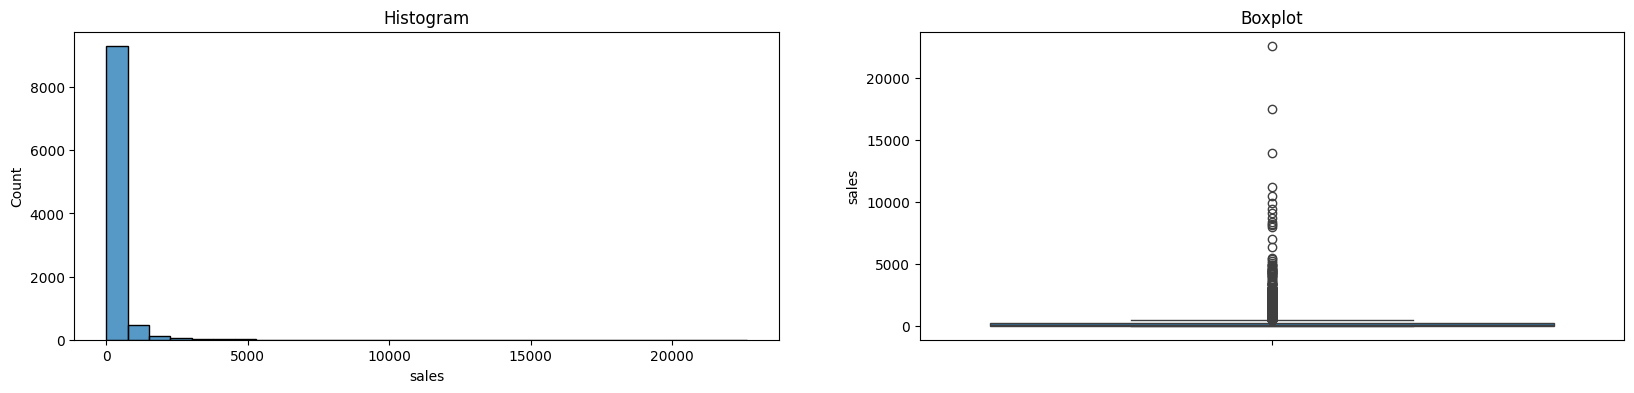

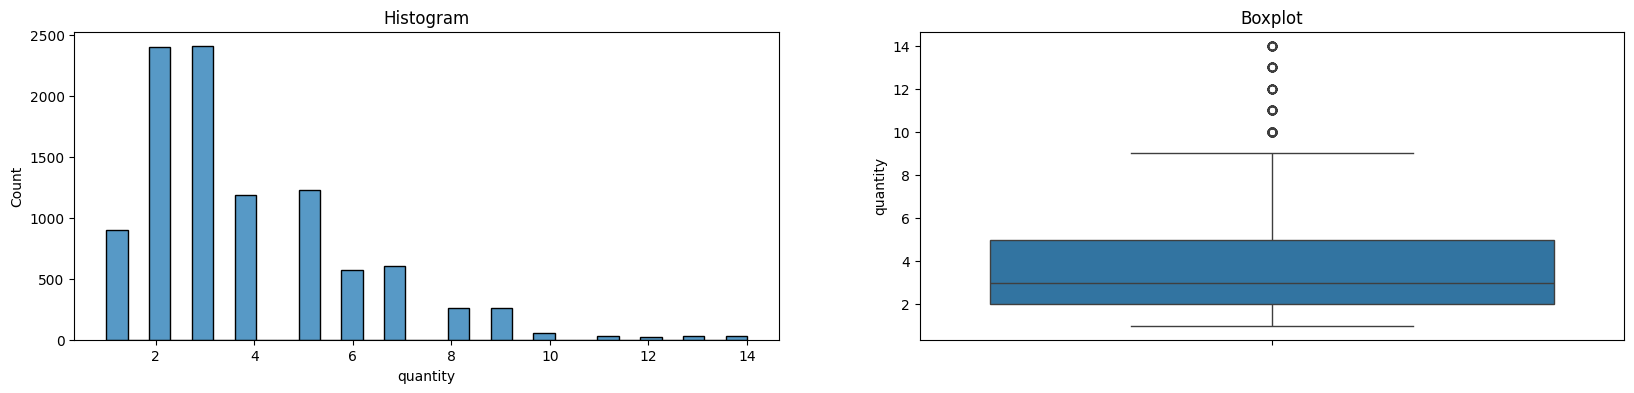

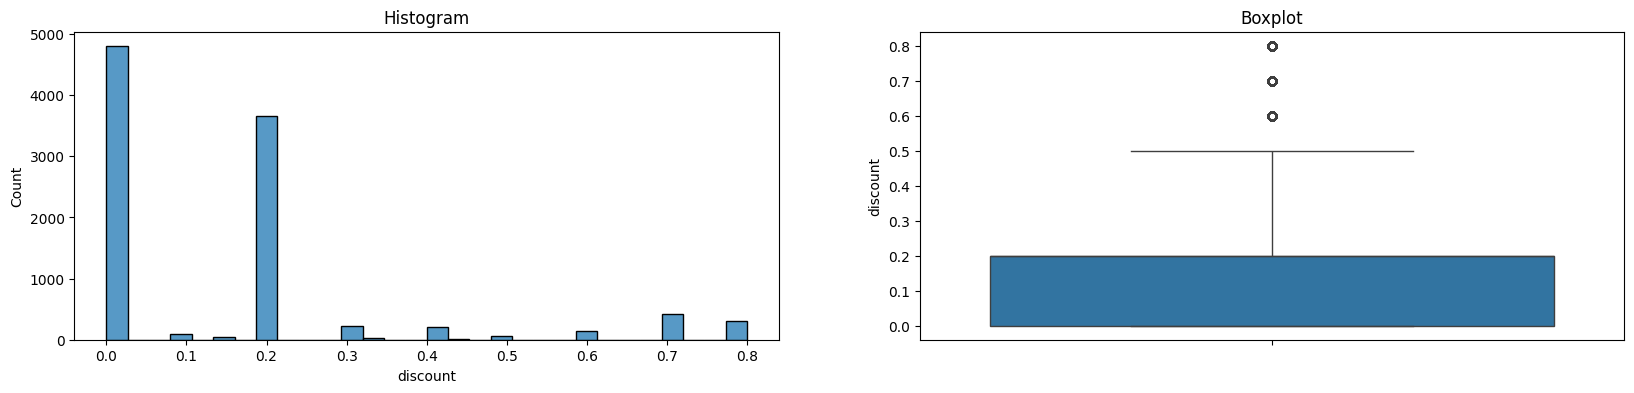

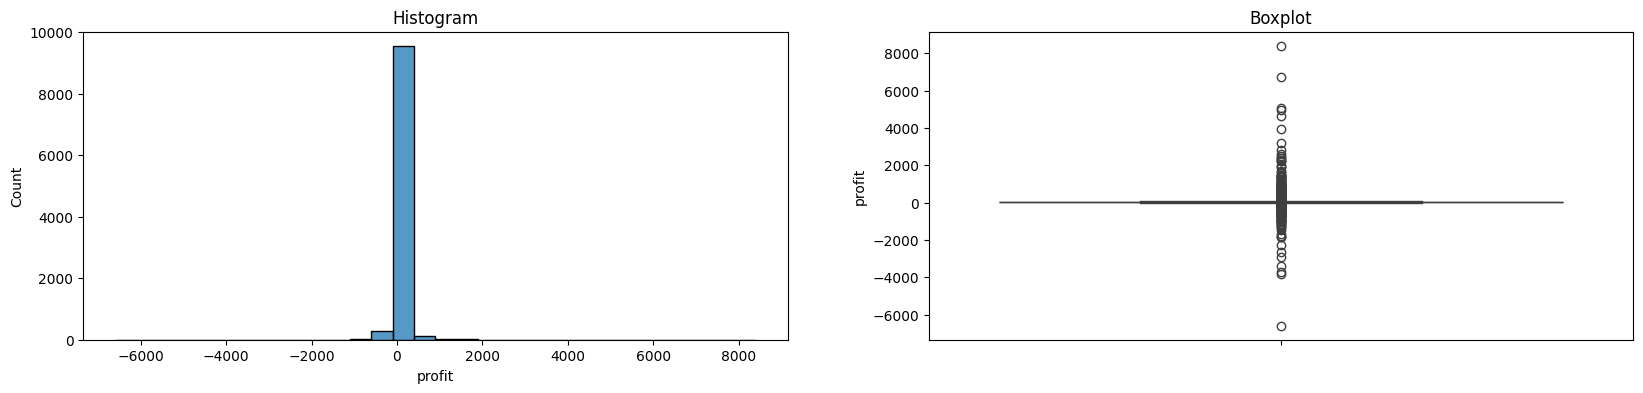

In [ ]:
check_plot(df_cusmen, features)

In [ ]:
df_cusmen[['sales', 'quantity', 'discount', 'profit']].describe()

,sales,quantity,discount,profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
def find_outlier_boundary(df_cusmen,features):

    IQR = df_cusmen[features].quantile(0.75) - df_cusmen[features].quantile(0.25)

    lower_boundary = df_cusmen[features].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df_cusmen[features].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [ ]:
full_occup_upper_limit, full_occup_lower_limit = find_outlier_boundary(df_cusmen, features)
print(f"upper limit : \n{full_occup_upper_limit}")
print(f"lower limit : \n{full_occup_lower_limit}")

upper limit : 
sales       498.930000
quantity      9.500000
discount      0.500000
profit       70.816875
dtype: float64
lower limit : 
sales      -271.710000
quantity     -2.500000
discount     -0.300000
profit      -39.724125
dtype: float64


In [ ]:
for col in features:
    df_cusmen = df_cusmen[
        (df_cusmen[col] >= full_occup_lower_limit[col]) &
        (df_cusmen[col] <= full_occup_upper_limit[col])
    ]


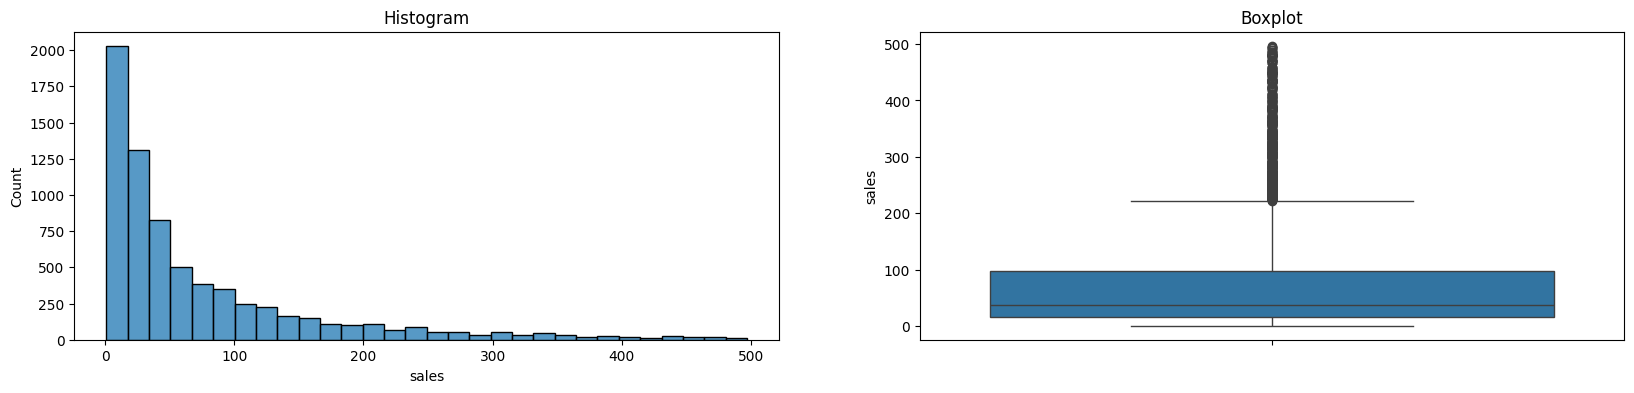

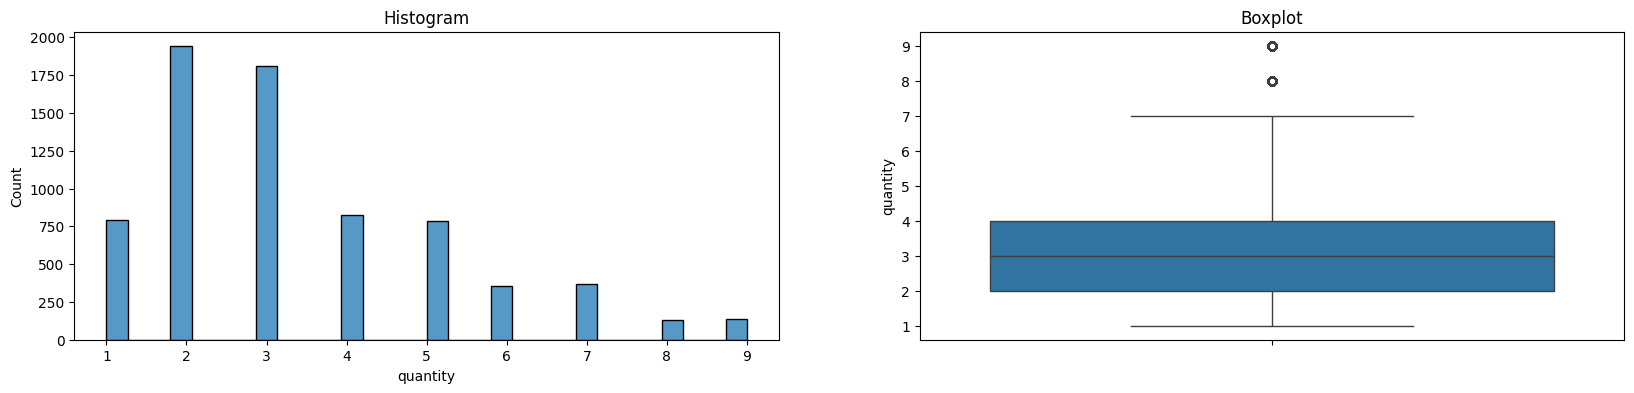

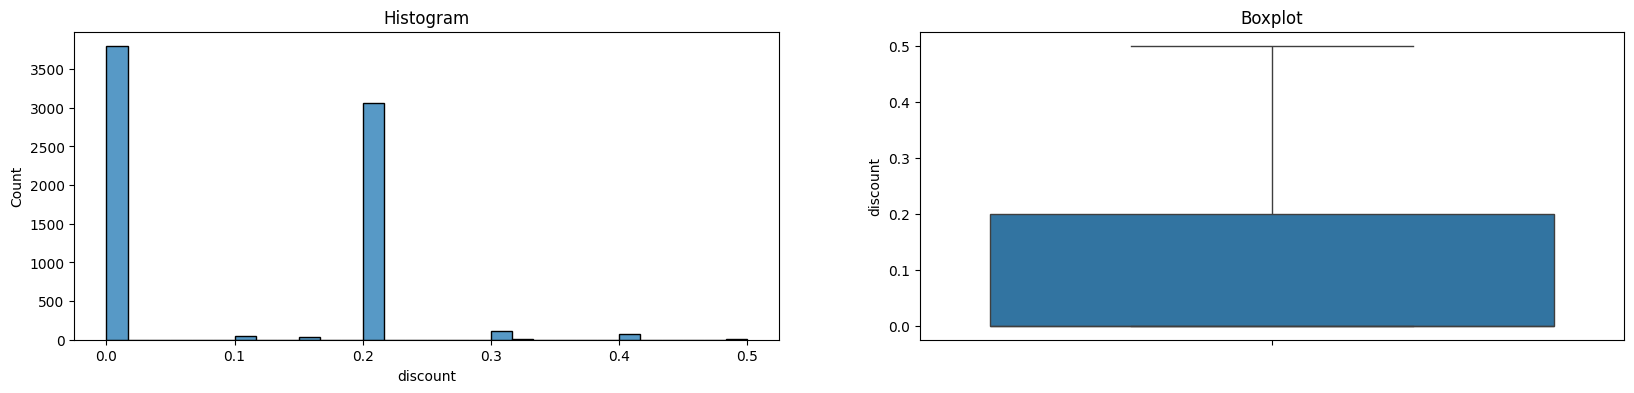

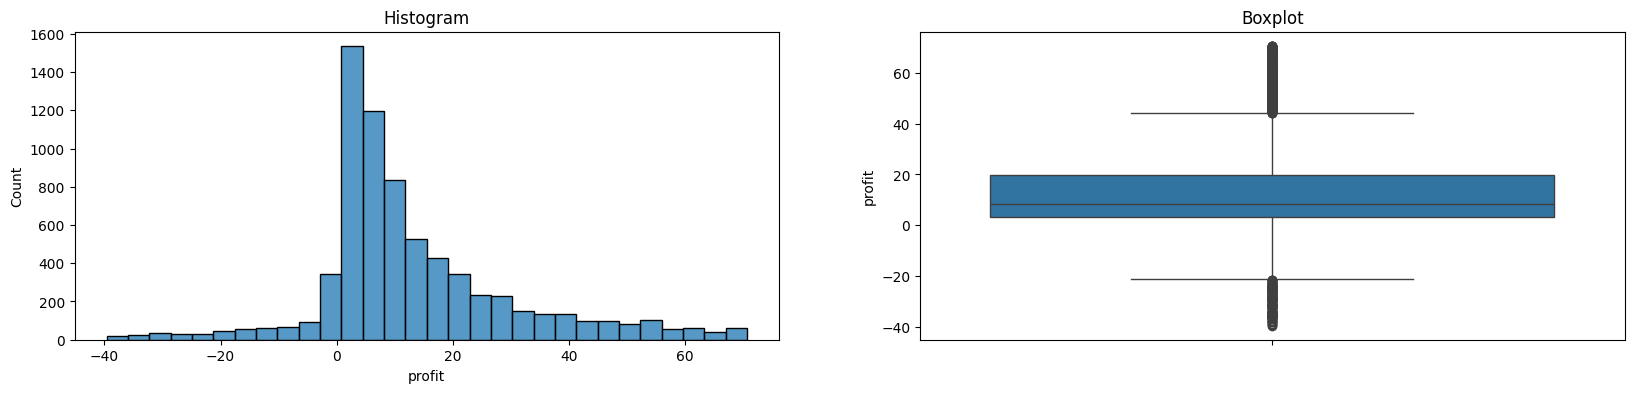

In [ ]:
check_plot(df_cusmen, features)

In [ ]:
df_cusmen.to_excel('cusmen.xlsx')